In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the data
data0 = pd.read_csv('urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [3]:
#Checking the shape of the dataset
data0.shape

(10000, 18)

In [4]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [5]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset. 

In [6]:
#Dropping the Domain column
data = data0.drop(['Domain', 'URL_Length', 'URL_Depth'], axis = 1).copy()

In [7]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [8]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,1
1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1
4,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0


**Sptlit Data**

In [9]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 14), (10000,))

In [10]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)

X_train.shape, X_test.shape

((8000, 14), (2000, 14))

In [11]:
X_train.head()

,Have_IP,Have_At,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards
5951,0,0,0,0,0,0,0,1,0,1,0,0,1,0
6630,0,0,0,0,1,0,1,1,1,1,0,0,1,0
3240,0,0,0,0,0,0,1,1,1,1,0,0,1,0
5942,0,0,0,0,0,0,0,1,1,1,0,0,1,0
3789,1,0,0,0,0,0,0,1,1,1,0,0,1,0


In [12]:
y_train.head()

5951    0
6630    1
3240    0
5942    0
3789    1
Name: Label, dtype: int64

**ML**

In [13]:
#importing packages
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from cm import make_confusion_matrix

In [14]:
# Creating holders to store the model performance results
ML_Model = []
acc_test = []

#function to call for storing the results
def storeResults(model, a):
  ML_Model.append(model)
  acc_test.append(str(round(a*100, 2))+'%')

In [15]:
def perform_model(model, name):
    model.fit(X_train.values, y_train.values)
    y_pred = model.predict(X_test.values)

    acc_test = accuracy_score(y_test.values,y_pred)
    print("Accuracy on test Data: {:.3f}".format(acc_test))

    labels = ['True Neg','False Pos','False Neg','True Pos']
    categories = ['Legit', 'Phishing']
    make_confusion_matrix(confusion_matrix(y_test.values,y_pred), 
                        group_names=labels,
                        categories=categories, 
                        cmap='binary',
                        title=name)
    
    storeResults(name, acc_test)

Accuracy on test Data: 0.670


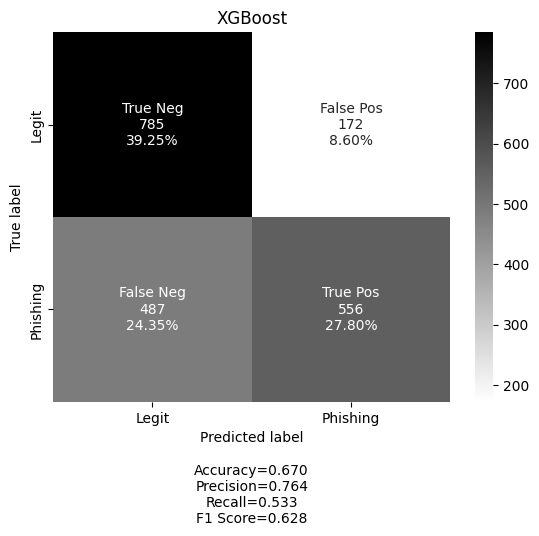

In [16]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.4,max_depth=7)

perform_model(xgb, 'XGBoost')

Accuracy on test Data: 0.670


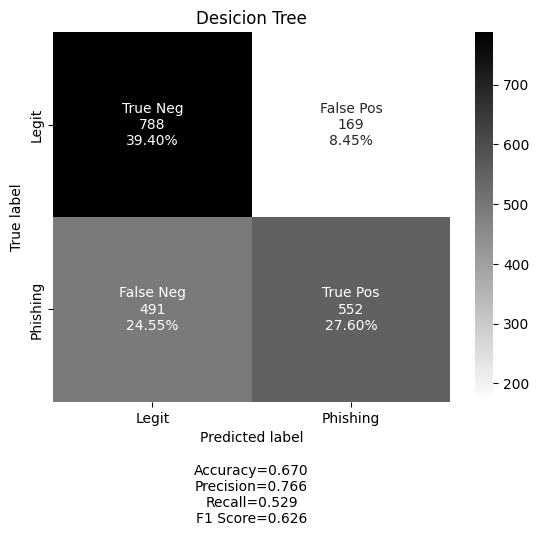

In [17]:
from sklearn.tree import DecisionTreeClassifier

desicion_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

perform_model(desicion_tree, 'Desicion Tree')

Accuracy on test Data: 0.670


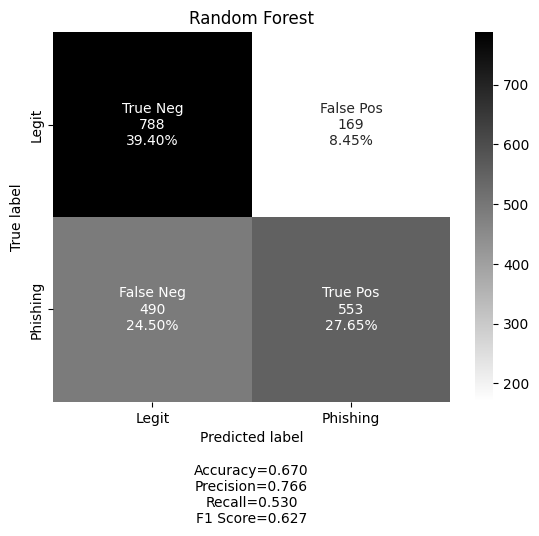

In [18]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)

perform_model(random_forest, 'Random Forest')

Iteration 1, loss = 0.69182146
Iteration 2, loss = 0.68814315
Iteration 3, loss = 0.68582527
Iteration 4, loss = 0.68400754
Iteration 5, loss = 0.68247763
Iteration 6, loss = 0.68097391
Iteration 7, loss = 0.67951904
Iteration 8, loss = 0.67807047
Iteration 9, loss = 0.67668033
Iteration 10, loss = 0.67528902
Iteration 11, loss = 0.67384246
Iteration 12, loss = 0.67238058
Iteration 13, loss = 0.67084612
Iteration 14, loss = 0.66933330
Iteration 15, loss = 0.66770143
Iteration 16, loss = 0.66611103
Iteration 17, loss = 0.66446938
Iteration 18, loss = 0.66275262
Iteration 19, loss = 0.66092498
Iteration 20, loss = 0.65911143
Iteration 21, loss = 0.65714028
Iteration 22, loss = 0.65514803
Iteration 23, loss = 0.65317114
Iteration 24, loss = 0.65121831
Iteration 25, loss = 0.64915390
Iteration 26, loss = 0.64706281
Iteration 27, loss = 0.64501309
Iteration 28, loss = 0.64297012
Iteration 29, loss = 0.64093623
Iteration 30, loss = 0.63892835
Iteration 31, loss = 0.63694096
Iteration 32, los

/opt/homebrew/anaconda3/envs/default/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


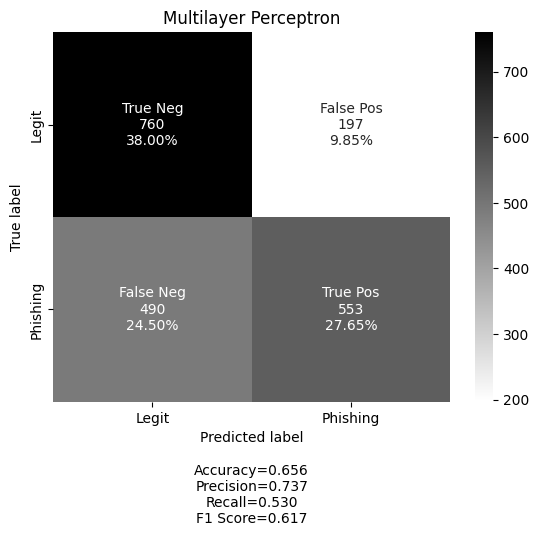

In [19]:
from sklearn.neural_network import MLPClassifier

multilayer_perceptron = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000, alpha=0.0001, solver='sgd', verbose=10, random_state=0, tol=0.000000001)

# perform_model(multilayer_perceptron, 'Multilayer Perceptron')

Accuracy on test Data: 0.669


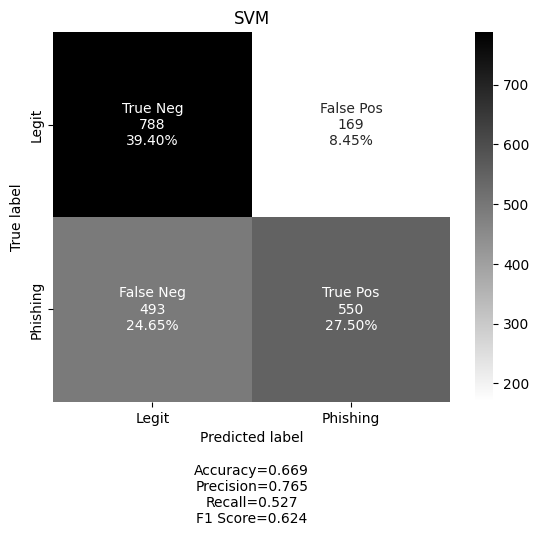

In [20]:
from sklearn.svm import SVC

svm = SVC(kernel='poly', random_state=0, probability=True)

perform_model(svm, 'SVM')

In [21]:
pd.DataFrame({'ML Model': ML_Model, 'Test Accuracy': acc_test}).sort_values(by=['Test Accuracy'], ascending=False)

,ML Model,Test Accuracy
0,XGBoost,67.05%
2,Random Forest,67.05%
1,Desicion Tree,67.0%
4,SVM,66.9%
3,Multilayer Perceptron,65.65%


In [22]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBClassifier1.pickle.dat", "wb"))

In [23]:
pickle.dump(random_forest, open("Random_Forest_Classifier2.pickle.dat", "wb"))